In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
wine = datasets.load_wine()
X, y = wine.data, wine.target

In [26]:
#normalisation- have different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#onehot encoding-categorical features where the values are not ordinal
y_onehot = tf.keras.utils.to_categorical(y, num_classes=3)

#Handling Missing Data
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(X)

#Feature Engineering-create new features that may better represent the underlying patterns
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

#Dimensionality Reduction- has a large number of features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X)

#Outlier Detection
from scipy import stats
z_scores = stats.zscore(X)
x_no_outliers = X[(np.abs(z_scores) < 3).all(axis=1)]

#feature selection- features and some may not contribute to model performance
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=2)
x_selected = selector.fit_transform(X, y)

#standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

#handle missing values
df_filled_median = df.fillna(df.median())
# Fill missing values with the mode of the column
df_filled_mode = df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

Epoch 1/200


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.2152 - loss: 1.5064 - val_accuracy: 0.1600 - val_loss: 1.4762
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2249 - loss: 1.4008 - val_accuracy: 0.1600 - val_loss: 1.3834
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3408 - loss: 1.2799 - val_accuracy: 0.2400 - val_loss: 1.3009
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4518 - loss: 1.1737 - val_accuracy: 0.2800 - val_loss: 1.2266
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4221 - loss: 1.1063 - val_accuracy: 0.3600 - val_loss: 1.1574
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4850 - loss: 1.0933 - val_accuracy: 0.4400 - val_loss: 1.0964
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5624 - loss: 0.9861 - val_accuracy: 0.4400 - val_loss: 1.0361
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5863 - loss: 0.9790 - val_accuracy: 0.4800 - val_l

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1541 - loss: 1.7541 - val_accuracy: 0.2000 - val_loss: 1.4931
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1552 - loss: 1.6458 - val_accuracy: 0.2000 - val_loss: 1.3679
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2262 - loss: 1.3601 - val_accuracy: 0.2800 - val_loss: 1.2530
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1899 - loss: 1.4346 - val_accuracy: 0.3600 - val_loss: 1.1516
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2488 - loss: 1.3609 - val_accuracy: 0.4000 - val_loss: 1.0600
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3404 - loss: 1.2090 - val_accuracy: 0.4800 - val_loss: 0.9798
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3461 - loss: 1.0803 - val_accuracy: 0.5600 - val_loss: 0.9066
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4513 - loss: 1.0051 - val_accuracy: 0.5

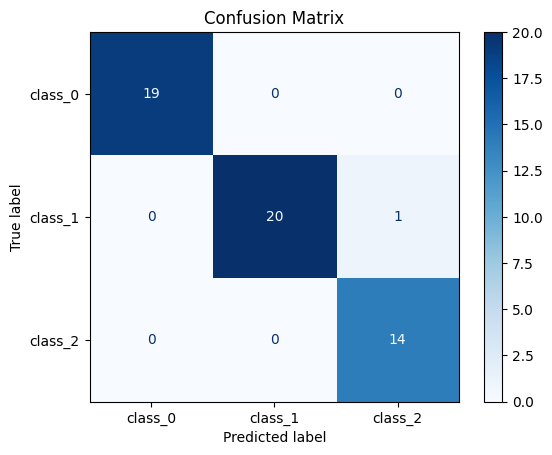

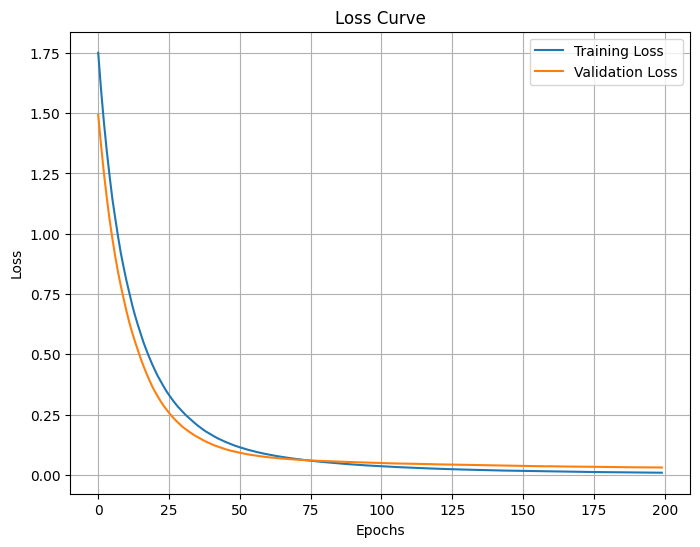

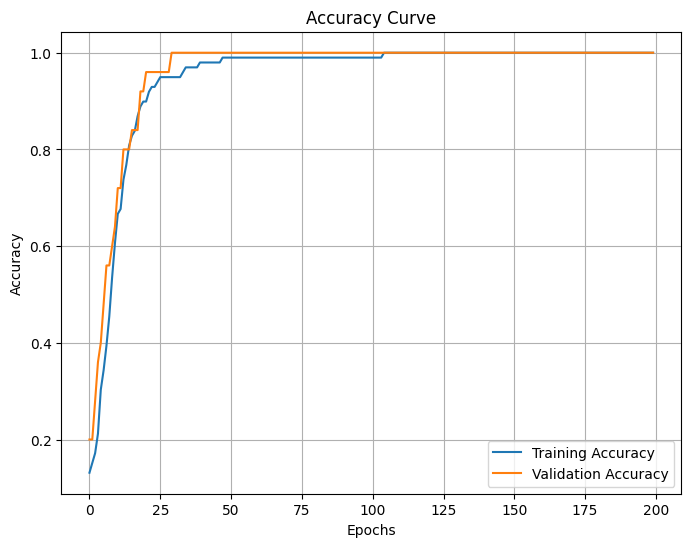

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),  
    tf.keras.layers.Dense(3, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=10, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_test, axis=1)  
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')



cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()